# 新词分析 #

In [3]:
%matplotlib inline
#%matplotlib notebook
%pylab inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (5, 5)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.pylabtools import figsize
figsize(14, 7)

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(18, 16), dpi= 80)
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})
sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 2.5})

import numpy as np
import matplotlib.ticker as ticker

dataPath = "../"
newWordFile = "../../test/ans/total.txt.src.nw"
unknowFile = "unknown.info"
recallFile = dataPath + "WordCRF.nw..r"
preFile = dataPath + "WordCRF.nw..p"

dis = pd.read_csv(newWordFile, sep="\\s+", names=["word", "type", "length", "pos", "tf", "pmi", "le", "re"])
#dis = pd.read_csv(newWordFile+"Dis", sep="\\s+", names=["word", "type","length", "pos", "tf", "pmi", "le", "re"])
src0 = pd.read_csv(unknowFile, sep="\\s+", names=["word", "type", "length", "pos", "tf", "pmi", "le", "re"])

recall = pd.read_csv(recallFile, sep="\\s+", names=["word", "type", "length", "pos", "tf", "pmi", "le", "re", "answer"])
pre = pd.read_csv(preFile, sep="\\s+", names=["word", "seg", "length", "pos", "tf", "pmi", "le", "re", "tfPre", "nothing", "label","answer"])

def label(ax):
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.0f}'.format(y), (x.mean(), y), ha='center', va='bottom')
    return ax

Populating the interactive namespace from numpy and matplotlib


In [ ]:
src0[~src0["word"].isin(src["word"])]

In [230]:
src[src["word"].str.contains("^\\d")]

,word,type,length,pos,tf,pmi,le,re
1011,０９４级,混合,4,n,-1,3,-1,-1
2408,７７４级,混合,4,n,-1,1,-1,-1
3573,０４１级,混合,4,n,-1,3,-1,-1
4067,９９师,混合,3,n,6,1,-1,-1
4071,１０５码,混合,4,ns,8,3,1,7
4188,５９Ｄ改型,混合,5,b,-1,5,-1,-1
4192,９７式,混合,3,b,-1,1,-1,-1
4216,５３式,混合,3,n,-1,1,-1,-1
4217,５６式,混合,3,n,8,3,0,7
4221,５４式,混合,3,n,-1,1,-1,-1


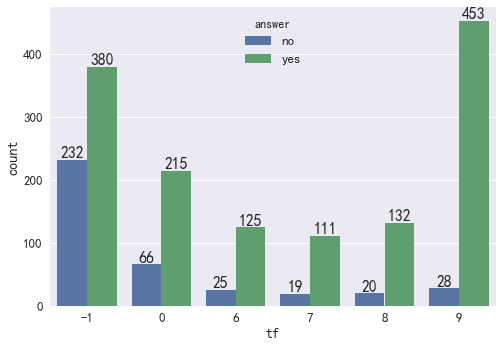

In [4]:
label(sns.countplot(x="tf",hue="answer", data=recall))

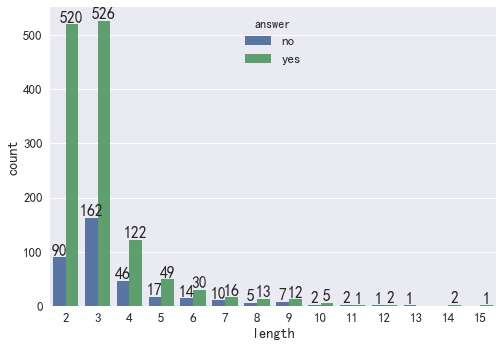

In [239]:
label(sns.countplot(x="length",hue="answer", data=recall))

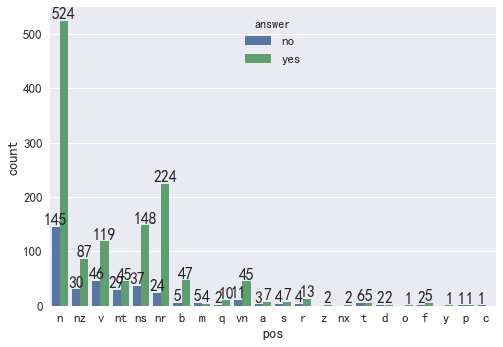

In [240]:
label(sns.countplot(x="pos",hue="answer", data=recall))

In [241]:
pre[pre["answer"].str.contains("no") & pre["word"].str.contains(".") & recall["pos"].str.contains("nr")]

,word,seg,length,pos,tf,pmi,le,re,tfPre,nothing,label,answer
137,穆斯塔法·卡亚摄,穆/斯/塔/法/·/卡/亚/摄,1/1/1/1/1/1/1/1,j/rg/j/j/w/n/j/vg,9/9/9/9/9/9/9/8,9/9/9/9/9/9/9/9,8/9/9/9/9/9/9/0,7/9/9/9/9/9/9/0,-2/6/7/0/0/7/0/-1,N/N/N/N/N/N/N/N,B/M/M/M/M/M/M/E,no
286,卡罗拉·穆诺兹的话,卡/罗/拉/·/穆/诺/兹/的话,1/1/1/1/1/1/1/2,n/j/v/w/j/ng/rg/u,9/9/9/9/9/9/9/9,9/9/9/9/9/9/9/0,9/8/9/9/8/8/7/9,9/6/9/9/7/9/7/7,0/0/0/8/0/0/0/0,N/N/N/N/N/N/N/N,B/M/M/M/M/M/M/E,no
377,长尼古拉·马伊达诺夫,长/尼/古/拉/·/马/伊/达/诺/夫,1/1/1/1/1/1/1/1/1/1,a/j/a/v/w/n/j/v/ng/ng,9/9/9/9/9/9/9/9/9/9,9/9/9/9/9/9/9/9/9/9,9/9/7/9/9/9/9/9/8/9,9/9/9/9/9/9/9/9/9/9,-1/-1/0/0/8/7/-1/-1/-1/7,N/N/N/N/N/N/N/N/N/N,B/M/M/M/M/M/M/M/M/E,no
669,希沙姆丁·侯赛,希/沙/姆/丁/·/侯/赛,1/1/1/1/1/1/1,j/n/x/nr/w/ng/vn,9/9/9/9/9/-1/8,9/9/9/9/9/9/9,9/9/8/8/9/-1/8,5/9/9/9/9/-1/8,0/7/7/7/-1/-1/-1,N/N/N/N/N/N/N,B/M/M/M/M/M/E,no
1177,国防大臣利亚姆·福克斯,国防/大臣/利/亚/姆/·/福/克/斯,2/2/1/1/1/1/1/1/1,n/n/n/j/x/w/n/q/rg,9/9/9/9/9/9/9/9/9,1/1/9/9/9/9/9/9/9,9/6/9/9/8/9/5/9/9,8/8/9/9/9/9/7/9/9,0/0/-1/9/-1/-1/-1/8/9,N/N/N/N/N/N/N/N/N,B/M/M/M/M/M/M/M/E,no
1563,局局长詹姆斯·赛,局/局长/詹/姆/斯/·/赛,1/2/1/1/1/1/1,n/n/nr/x/rg/w/vn,9/0/-1/9/9/9/8,9/0/9/9/9/9/9,9/-1/-1/8/9/9/8,9/1/-1/9/9/9/8,0/0/-1/-1/-1/0/-1,N/N/N/N/N/N/N,B/M/M/M/M/M/E,no


In [242]:
recall[recall["answer"].str.contains("no") & recall["pos"].str.contains("nr") & recall["word"].str.contains(".")  & (recall["tf"])]

,word,type,length,pos,tf,pmi,le,re,answer
22,麻生太郎,纯汉字,4,nr,-1,9,-1,-1,no
319,吞敏奈,纯汉字,3,nr,-1,9,-1,-1,no
489,申仁均,纯汉字,3,nr,-1,9,-1,-1,no
715,希沙姆丁·侯赛因,汉字加连字符斜杠分隔符,8,nr,-1,8,-1,-1,no
770,石川和秀,纯汉字,4,nr,-1,9,-1,-1,no
900,穆斯塔法·卡亚,汉字加连字符斜杠分隔符,7,nr,-1,8,-1,-1,no
938,文在寅,纯汉字,3,nr,7,9,1,8,no
1125,葛厦,纯汉字,2,nr,-1,9,-1,-1,no
1158,诺列加,纯汉字,3,nr,-1,7,-1,-1,no
1191,昌德,纯汉字,2,nr,-1,6,-1,-1,no


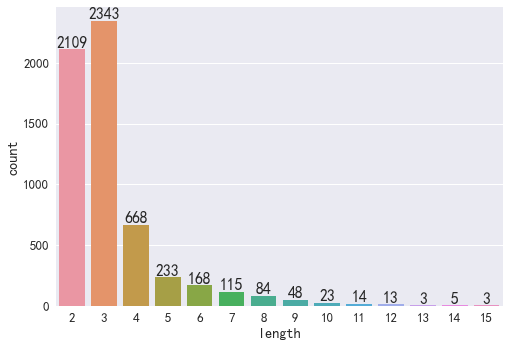

In [159]:
label(sns.countplot(src["length"]))

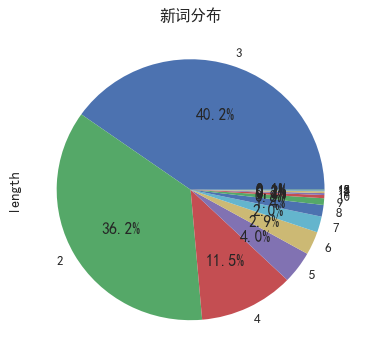

In [144]:
src["length"].value_counts().plot.pie(figsize=(6,6), autopct='%1.1f%%').set_title("新词分布")

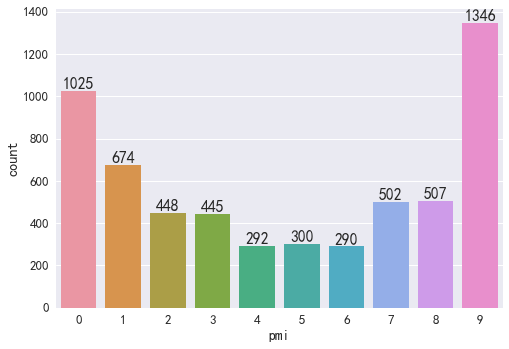

In [145]:
countplot(dis["pmi"]);

# 新词统计量

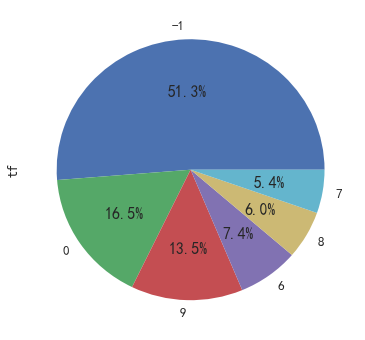

In [146]:
src["tf"].value_counts().plot.pie(figsize=(6,6), autopct='%1.1f%%')

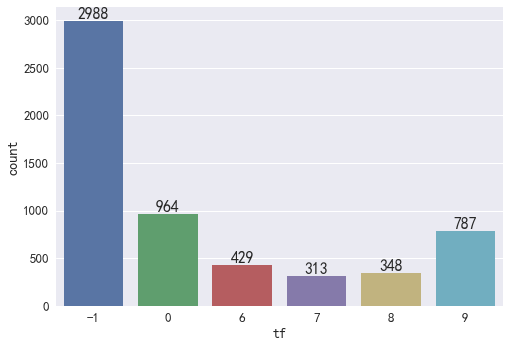

In [147]:
countplot(dis["tf"])

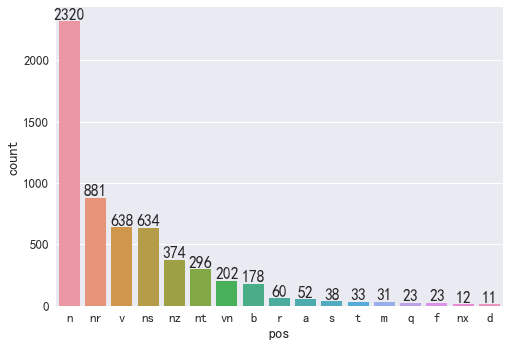

In [128]:
tmp = dis.groupby('pos').filter(lambda x: len(x) > 10)
ax = sns.countplot(tmp["pos"], order=tmp.groupby('pos').size().sort_values(ascending=False).index)
label(ax)

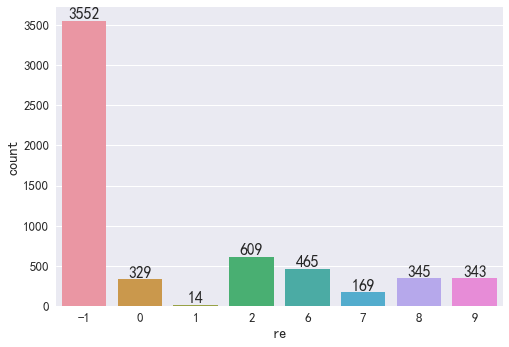

In [28]:
countplot(dis["re"])

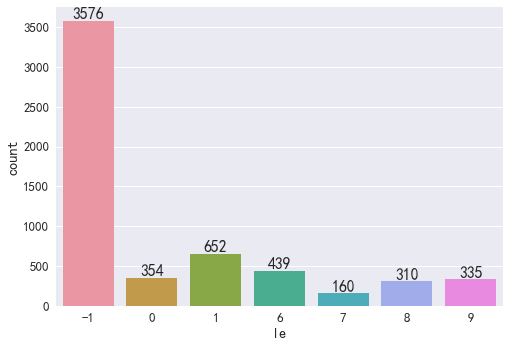

In [29]:
countplot(dis["le"])

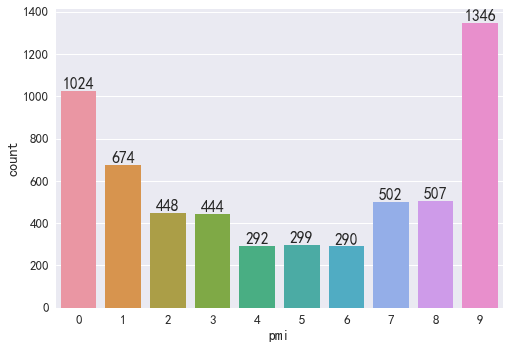

In [30]:
countplot(dis["pmi"])

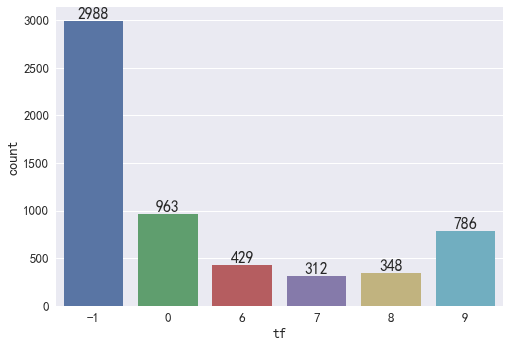

In [31]:
countplot(dis["tf"])

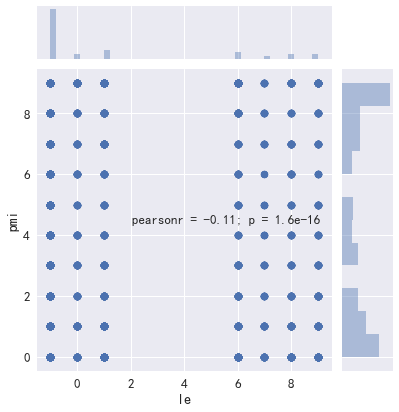

In [32]:
sns.jointplot(x="le", y="pmi", data=dis)

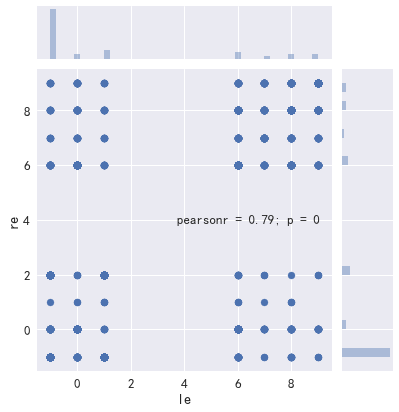

In [33]:
sns.jointplot(x="le", y="re", data=dis)

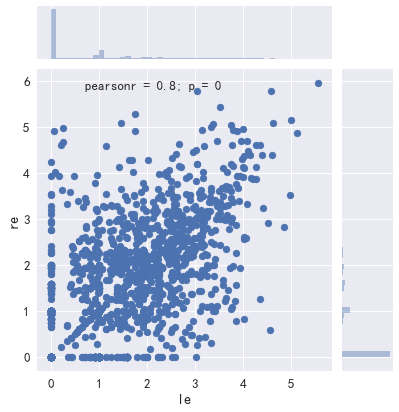

In [34]:
sns.jointplot(x="le", y="re", data=src)

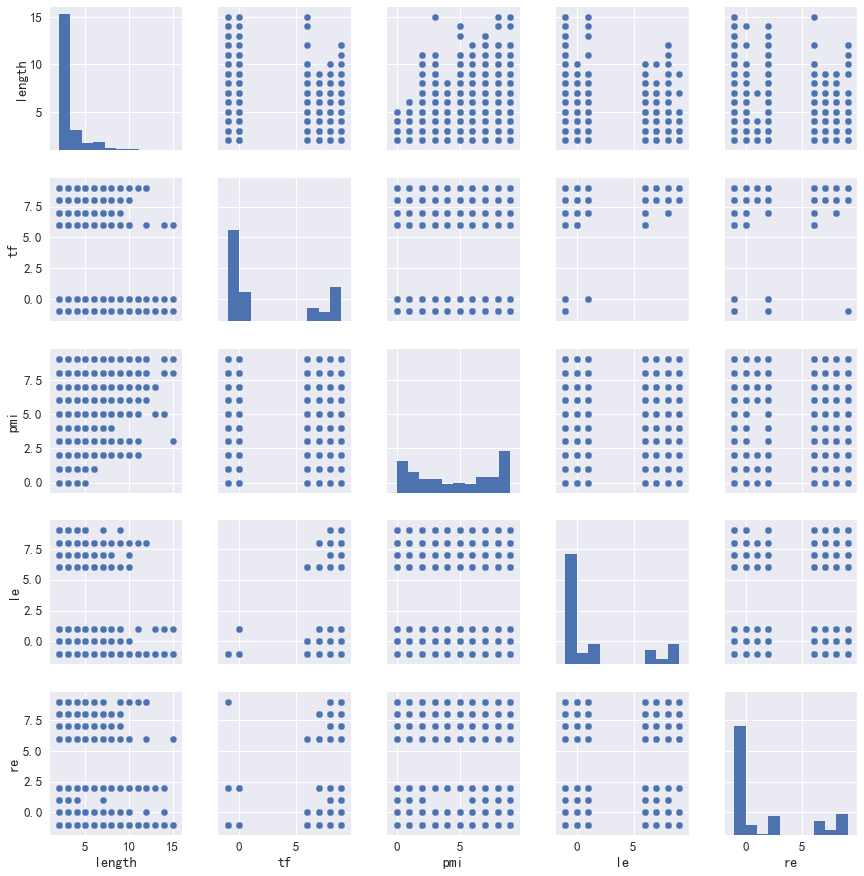

In [35]:
g = sns.pairplot(dis)

In [36]:
# src["pos"][src.groupby("pos").count() < 10]
src.groupby('pos').filter(lambda x: len(x) <= 12)

,word,type,length,pos,tf,pmi,le,re
234,既而,纯汉字,2,c,1,4.247928,0.000000,0.000000
261,尽管如此,纯汉字,4,c,5,10.546894,0.721928,0.000000
331,丛林地,纯汉字,3,u,1,7.087463,0.000000,0.000000
619,以致于,纯汉字,3,c,1,8.951285,0.000000,0.000000
706,而非,纯汉字,2,c,12,5.554589,1.584963,3.418296
1302,歼－１５,混合,4,nx,6,8.257388,1.792481,1.792481
1592,之于,纯汉字,2,p,1,-Infinity,0.000000,0.000000
1608,迄未,纯汉字,2,d,1,8.060696,0.000000,0.000000
1741,更是,纯汉字,2,d,21,4.000000,3.744239,4.201841
1797,野心勃勃,纯汉字,4,z,1,12.878817,0.000000,0.000000


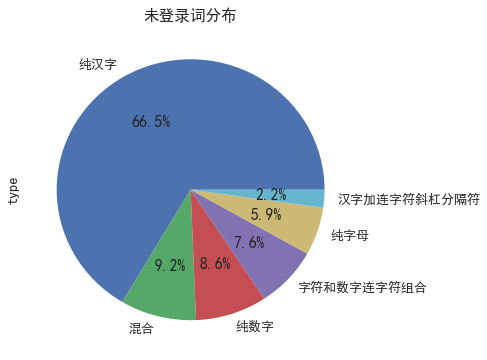

In [46]:
src0["type"].value_counts().plot.pie(figsize=(6,6), autopct='%1.1f%%').set_title("未登录词分布")

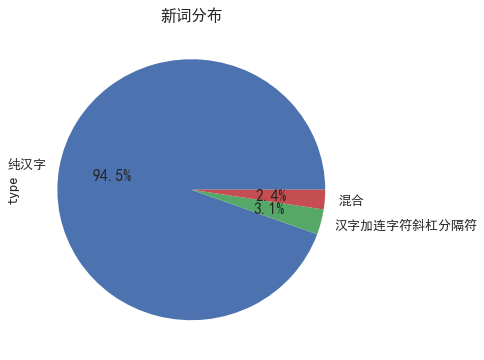

In [47]:
src["type"].value_counts().plot.pie(figsize=(6,6), autopct='%1.1f%%').set_title("新词分布")